## TLS classification use Mfuzz
### In this notebook, we will predict the developmental tendency of each TLS based on the slope of the linear regression, and group them into Conforming or Deviating TLS. 

In [1]:
suppressMessages({library("Mfuzz")
                 library(repr)})

Warning message in fun(libname, pkgname):
“couldn't connect to display "localhost:13.0"”


In [2]:
df = read.table("/data/yuchen_data/Stereo_seq/All_Figures/Tls_classification/1.data/pre.mfuzz.txt", row.names=1, header=T, sep='\t')
head(df)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ST2931P_41,0.4406936,0.3772652,0.3138368,0.2504085,0.1869801,0.1235517,0.06012328,-0.003305106,-0.06673350,-0.13016189
ST2893B_111,0.4050218,0.3644009,0.3237799,0.2831590,0.2425380,0.2019171,0.16129609,0.120675131,0.08005417,0.03943321
ST2893T_20,0.3880541,0.3860484,0.3840427,0.3820370,0.3800314,0.3780257,0.37602002,0.374014342,0.37200867,0.37000299
ST2772B_62,0.3717026,0.3928306,0.4139586,0.4350866,0.4562146,0.4773426,0.49847057,0.519598560,0.54072655,0.56185454
ST2846B_138,0.4333379,0.4183060,0.4032742,0.3882423,0.3732104,0.3581786,0.34314672,0.328114857,0.31308300,0.29805114
ST2893B_8,0.3721454,0.3753460,0.3785467,0.3817474,0.3849480,0.3881487,0.39134934,0.394550000,0.39775066,0.40095132


In [3]:
# load mature TLS information
df_group = read.csv('/data/yuchen_data/Stereo_seq/All_Figures/Tls_classification/1.data/Mature_TLS.infor.txt', row.names=1, sep='\t')
mature_tls = row.names(df_group)

In [4]:
# clustering only use immature TLS
used_tls = setdiff(row.names(df), mature_tls)
df = df[used_tls, ]

In [5]:
eset = new("ExpressionSet", exprs = data.matrix(df))
c = 40
m <- mestimate(eset)
cl <- mfuzz(eset, c = c, m = m)

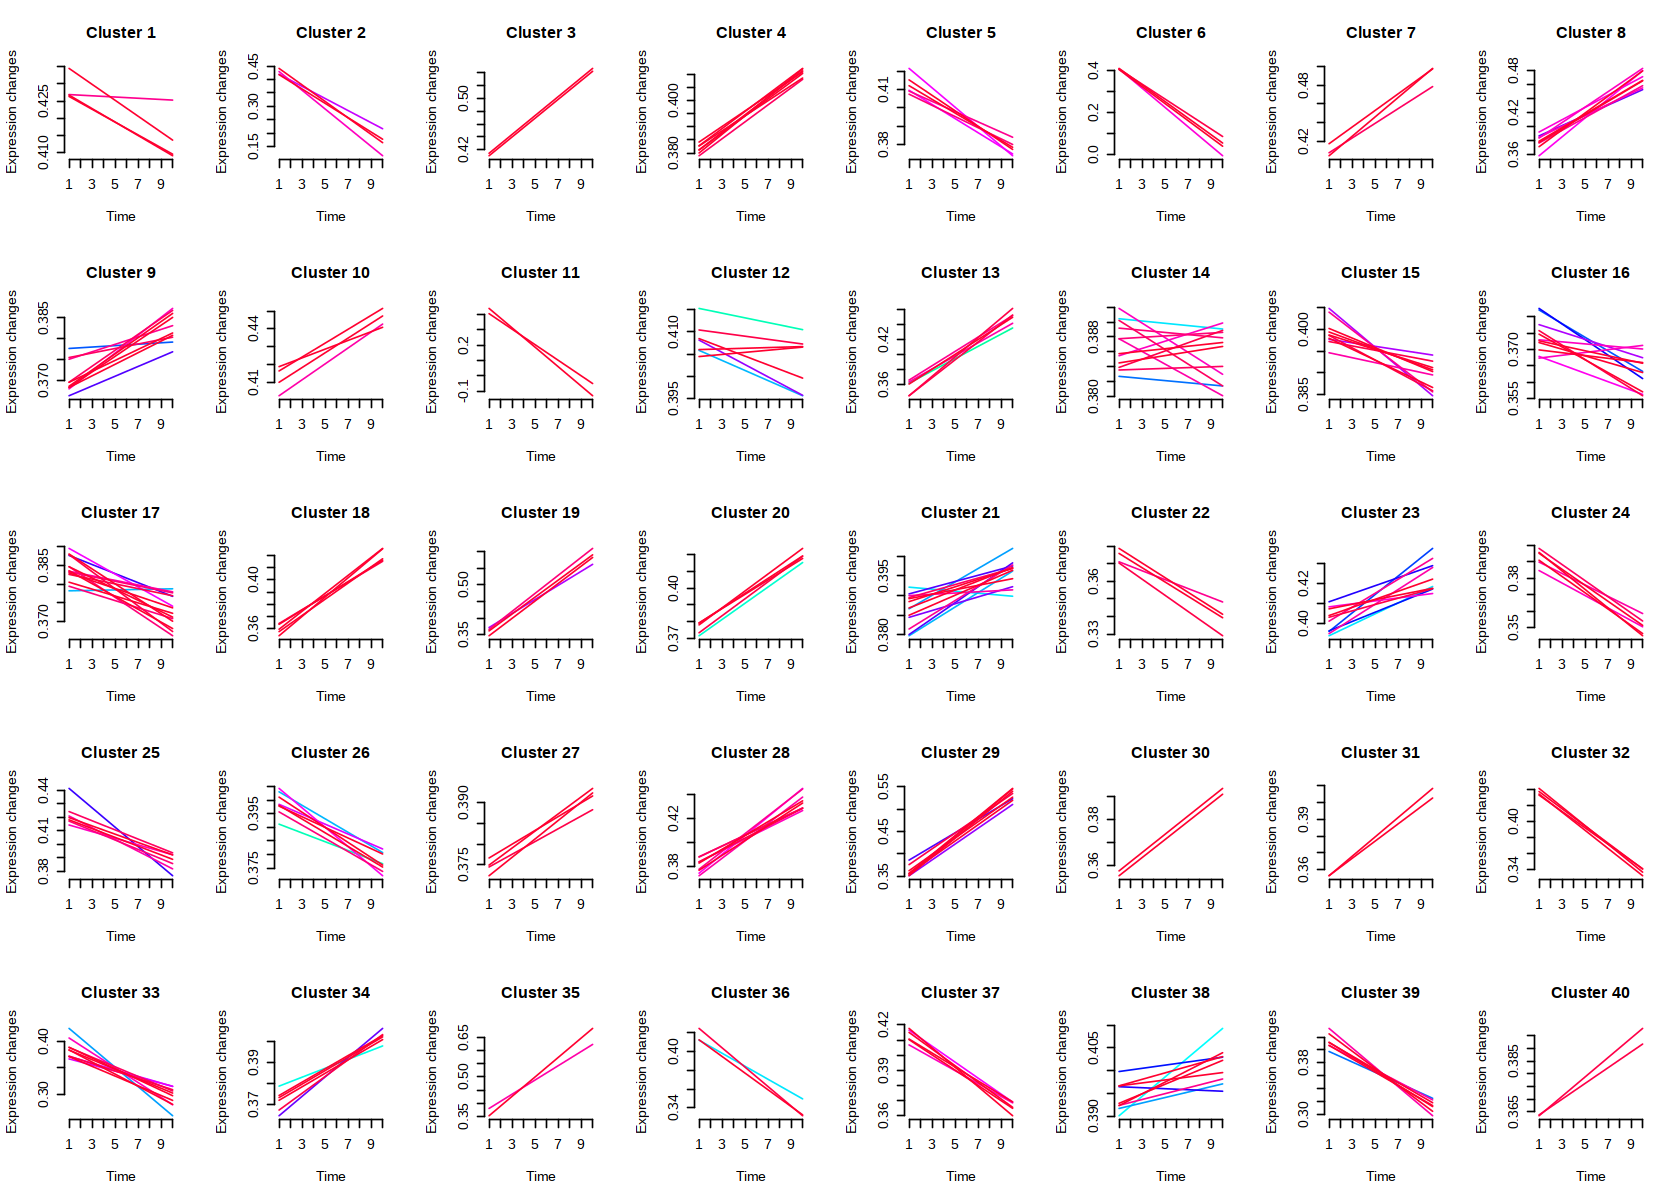

In [6]:
options(repr.plot.width=14, repr.plot.height=10)
mfuzz.plot(eset,cl,mfrow=c(5,8),new.window= FALSE)

In [7]:
# we defined the TLS with positive slope as Conforming and TLS with negative slope as Deviating
df_cluster = data.frame(cl$cluster)
dic_merge <- c('Deviating','Deviating', 'Conforming', 'Conforming', 'Deviating', 'Deviating', 'Conforming', 'Conforming',
              'Conforming', 'Conforming', 'Deviating', 'Deviating', 'Conforming', 'Deviating', 'Deviating', 'Deviating',
              'Deviating', 'Conforming', 'Conforming', 'Conforming', 'Conforming', 'Deviating', 'Conforming', 'Deviating',
              'Deviating', 'Deviating', 'Conforming', 'Conforming', 'Conforming', 'Conforming', 'Conforming', 'Deviating',
              'Deviating', 'Conforming', 'Conforming', 'Deviating', 'Deviating', 'Conforming', 'Deviating', 'Conforming')
tmp = 1:40
names(dic_merge) = tmp

In [8]:
tmp = c()
for (i in df_cluster$'cl.cluster') {
    cur_v <- dic_merge[[as.character(i)]]
    tmp <- c(tmp, cur_v)
}
df_cluster$'Group' = tmp
df_cluster = df_cluster[, 'Group', drop=F]

df_mature = data.frame(row.names=mature_tls, Group=rep('Mature', length(mature_tls)))
df_cluster = rbind(df_cluster, df_mature)

In [9]:
head(df_cluster)

,Group
,<chr>
ST2931P_41,Deviating
ST2893B_111,Deviating
ST2893T_20,Deviating
ST2772B_62,Conforming
ST2846B_138,Deviating
ST2893B_8,Conforming


In [23]:
# load pre-defined Deviating tls
df_tmp = read.table('/data/yuchen_data/Stereo_seq/All_Figures/Tls_classification/1.data/pre.Deviating.tls.txt', row.names=1, header=F)
df_tmp$Group = rep('Deviating', nrow(df_tmp))
df_final = rbind(df_cluster, df_tmp)

In [24]:
dim(df_final)

[1] 299   1

In [25]:
head(df_final)

,Group
,<chr>
ST2931P_41,Deviating
ST2893B_111,Deviating
ST2893T_20,Deviating
ST2772B_62,Conforming
ST2846B_138,Deviating
ST2893B_8,Conforming
